### Оптимизация маркетинговых затрат в Яндекс.Афише.

### План проекта
 
1.[Открыть файл с данными и изучить общую информацию](#cell1)

2.[Подготовка данных](#cell2)

3.[Расчет метрик и построение графиков](#cell3)

4.[Выводы и рекомендации](#cell4)


### Открыть файлы с данными и изучить общую информацию.
<a id='cell1'></a>

4.1 Импорт библиотеки pandas.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import statistics

4.2 Сохранил данные о визитах, заказах и рекламных расходах в переменные.

In [63]:
visits_df = pd.read_csv('/datasets/visits_log.csv')
orders_df = pd.read_csv('/datasets/orders_log.csv')
costs_df = pd.read_csv('/datasets/costs.csv')

4.3 Ознакомился с информацией в таблицах, вызвав методы info(), head(), describe(). 

* info()

In [64]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [65]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [66]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Вывод: в каждом из трех датафреймов необходимо поменять тип данных в столбцах с датами с object на datetime.

* head()

In [67]:
visits_df.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [68]:
orders_df.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [69]:
costs_df.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


* describe()

In [70]:
pd.set_option('display.float_format', '{:,.2f}'.format)
visits_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Device,359400,2,desktop,262567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Ts,359400,224760,2017-11-24 16:51:00,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Id,"359,400.00",NaN,NaN,NaN,3.75,1.92,1.00,3.00,4.00,5.00,10.00
Start Ts,359400,224303,2017-11-24 16:06:00,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uid,"359,400.00",NaN,NaN,NaN,"9,202,556,994,354,921,472.00","5,298,432,824,659,611,648.00","11,863,502,262,781.00","4,613,406,732,167,550,976.00","9,227,412,908,740,601,856.00","13,728,237,011,236,173,824.00","18,446,676,030,785,673,216.00"


Вывод: В большей мере на сайт заходят с компьютера (desktop),2017-11-24 дата когда на сайт чаще заходили. Количество строк по всем столбцам единоообразно.

In [71]:
pd.set_option('display.float_format', '{:,.2f}'.format)
orders_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buy Ts,50415,45991,2018-05-31 10:13:00,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,"50,415.00",NaN,NaN,NaN,5.00,21.82,0.00,1.22,2.50,4.89,"2,633.28"
Uid,"50,415.00",NaN,NaN,NaN,"9,098,160,634,289,729,536.00","5,285,741,550,834,715,648.00","313,578,113,262,317.00","4,533,566,627,250,599,936.00","9,102,273,602,618,561,536.00","13,682,901,980,465,401,856.00","18,446,167,067,214,817,280.00"


Вывод: Самая часто встречающаяся дата заказа 2018-05-31. Количество строк по всем столбцам единоообразно.

In [72]:
pd.set_option('display.float_format', '{:,.2f}'.format)
costs_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_id,"2,542.00",NaN,NaN,NaN,4.86,3.18,1.00,2.00,4.00,9.00,10.00
dt,2542,364,2018-02-25,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costs,"2,542.00",NaN,NaN,NaN,129.48,156.30,0.54,21.95,77.30,170.06,"1,788.28"


Вывод: Чаще всего рекламную компанию проводили 2018-03-03. Количество строк по всем столбцам единоообразно.

4.4 Произвел проверку пропущенных значений.

In [73]:
visits_df.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [74]:
orders_df.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [75]:
costs_df.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

4.5 Произвел проверку на дубликаты.

In [76]:
visits_df.duplicated().sum()

0

In [77]:
orders_df.duplicated().sum()

0

In [78]:
costs_df.duplicated().sum()

0

Вывод: в датафреймах отсутсвуют пропущенные значения и дубликаты.

### Подготовка данных.
<a id='cell2'></a>

5.1 Изменил название столбцов в датафреймах visits_df и orders_df.

In [79]:
#orders_df['Buy Ts'] = pd.to_datetime(orders_df['Buy Ts'])
visits_df.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'];
orders_df.columns = ['buy_ts', 'revenue', 'uid'];

5.2 Поменял тип данных в столбцах с датами с типа данных object на datetime.

In [80]:
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'], format="%Y.%m.%d %H:%M:%S")
orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

### Расчет метрик и построение графиков.
<a id='cell3'></a>

* Продуктовые метрики


6.1 Выделил в отдельные столбцы год, месяц и неделю, а также полную дату.

In [81]:
visits_df['visits_year']  = visits_df['start_ts'].dt.year
visits_df['visits_month'] = visits_df['start_ts'].dt.month
visits_df['visits_week']  = visits_df['start_ts'].dt.week
visits_df['visits_date'] = visits_df['start_ts'].dt.date
visits_df.head()

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


6.2 Посчитал метрики dau, wau, mau. Сгруппировал данные по уникальным пользователям и нашел среднее.

In [82]:
dau_total = visits_df.groupby('visits_date').agg({'uid': 'nunique'}).mean()
wau_total = (visits_df.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean())
mau_total = (visits_df.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean())

print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5716
23228


6.3  Отобразил изменение метрик dau, wau, mau во времени на графиках.

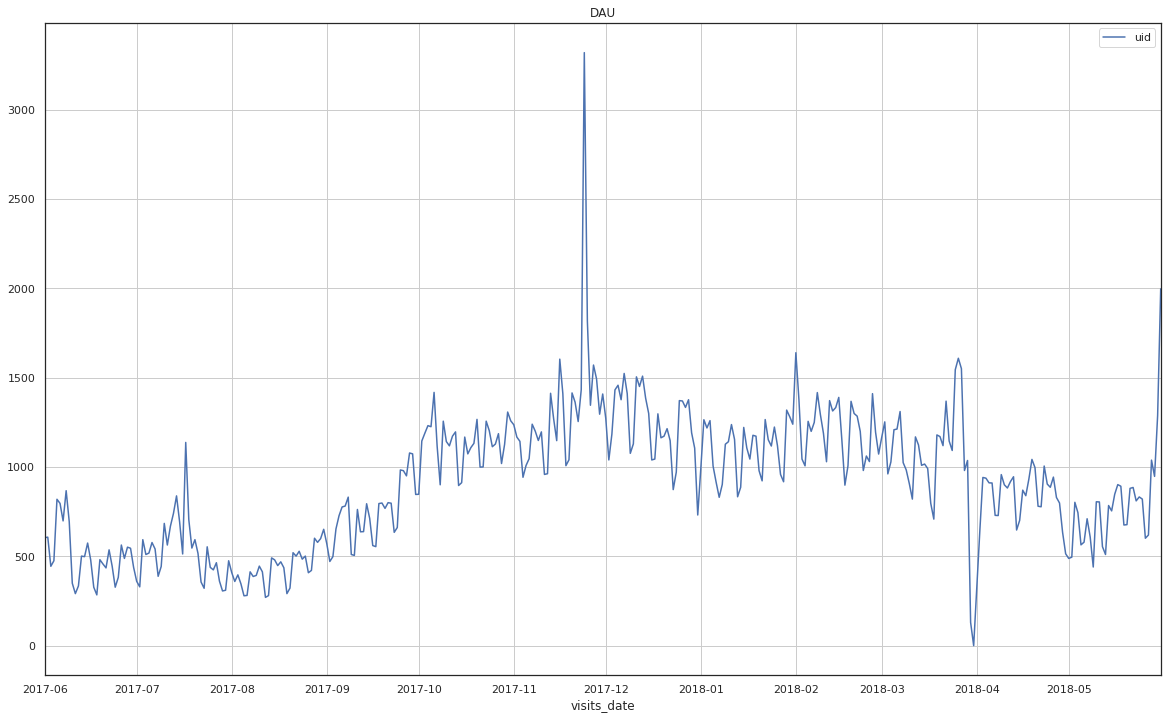

In [84]:
dau = visits_df.groupby('visits_date').agg({'uid': 'nunique'})
dau.plot(grid=True, figsize=(20, 12), title='DAU');
plt.show;

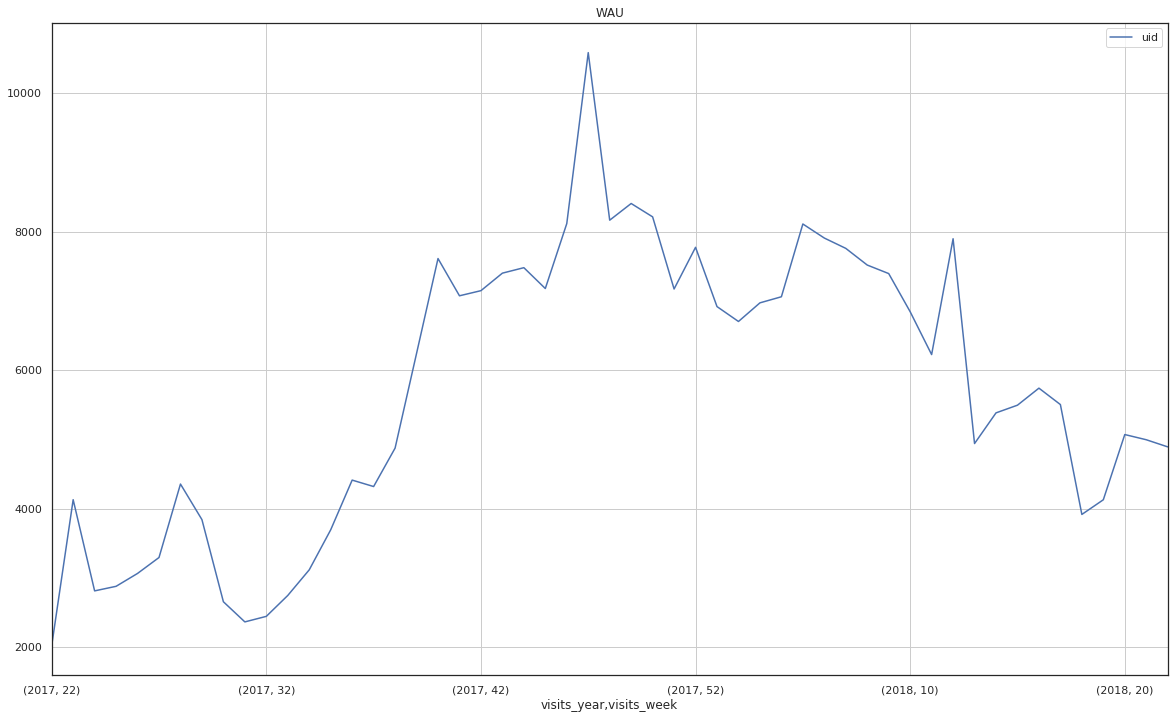

In [85]:
wau = (visits_df.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}))
wau.plot(grid=True, figsize=(20, 12), title='WAU');

plt.show;

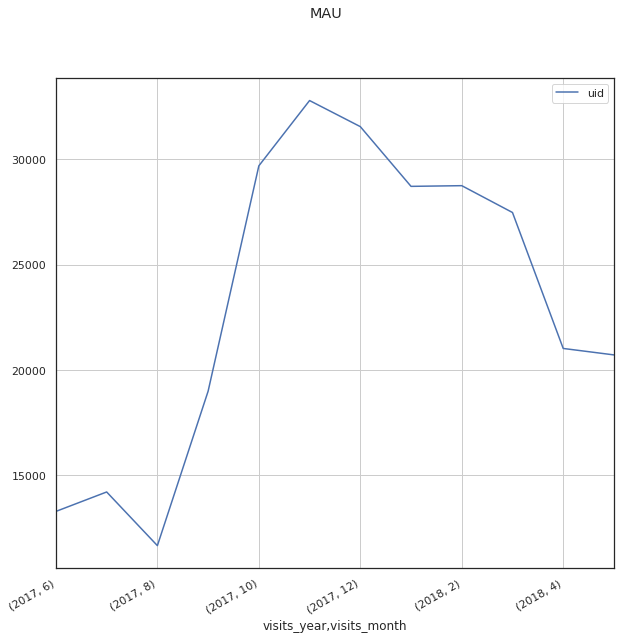

In [86]:
mau = (visits_df.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}))
mau.plot(subplots=True, grid=True, figsize=(10, 10), title='MAU')#labels=["january", "february", "march", "april", 'may', 'june', 'july', 'august', 'september','october', 'november', 'december'], autopct="%.2f", title='MAU');
plt.show;

Вывод: Максимальный скачок посещаемости сайта наблюдается в период с октября по декабрь, имеет место быть предновогодний период скидок. Апрель месяц выделился минимальным количеством посещения.

6.4 Посчитал сколько раз за день в среднем пользователь заходит на сайт и построил график.

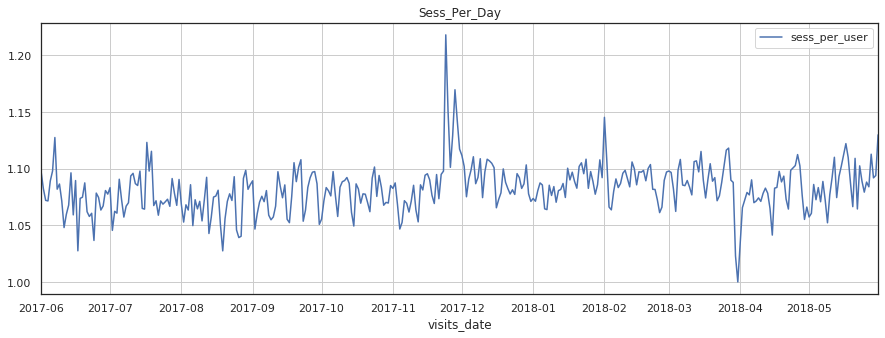

In [87]:
sessions_per_day = visits_df.groupby('visits_date').agg({'uid': ('count', 'nunique')})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sess_per_user'] = (sessions_per_day['n_sessions'] / sessions_per_day['n_users'])

sessions_per_day.plot(y='sess_per_user', grid=True, figsize=(15, 5), title='Sess_Per_Day');
plt.show;

In [88]:
display(sessions_per_day['sess_per_user'].median()) # видимо столько

1.0824875552419868

Вывод: Пользователь довольно редко заходит на сайт, в среднем всего лишь 1 раз, это низкий показатель.

6.5 Продолжительность сессии за весь период.

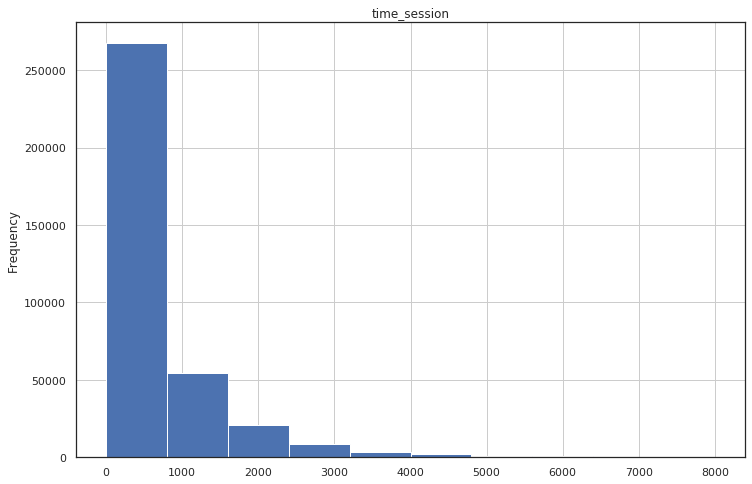

In [89]:
visits_df['time_session'] = visits_df['end_ts'] - visits_df['start_ts']
visits_df['time_session'] = (visits_df['time_session'].dt.seconds) 
visits_df['time_session'].plot(grid=True, title='time_session', kind='hist', figsize=(12, 8), range=(0,8000));

* медиана

In [90]:
visits_df['time_session'].median()

300.0

* среднее

In [91]:
visits_df['time_session'].mean()

643.506488592098

* мода

In [92]:
statistics.mode(visits_df['time_session'])

60

Вывод: Чаще всего пользователь проводит на сайте 1 минуту, довольно короткий промежуток времени, можно сделать вывод, что многие пользователи быстро теряют интерес к данному сайту т.к их сессия длится недолго.

6.4 Провел расчет Retention Rate.

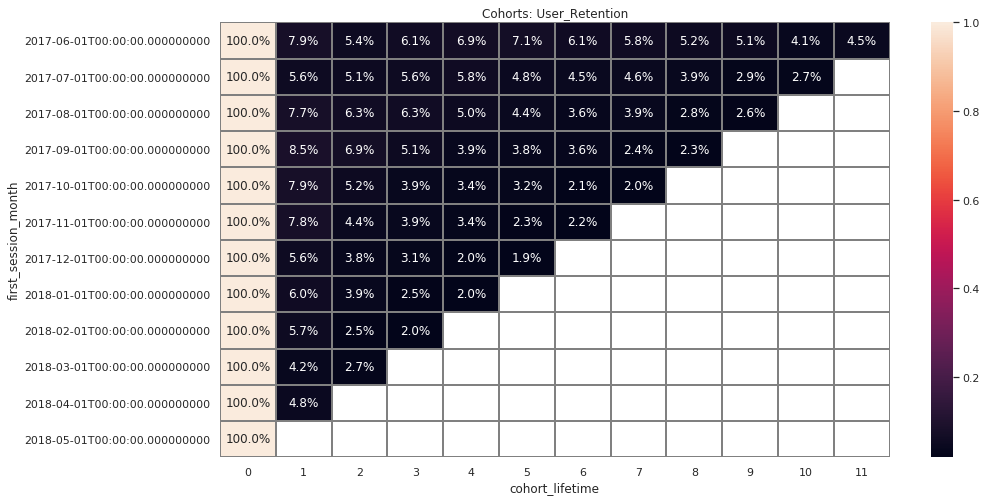

In [93]:
first_visits_date = visits_df.groupby('uid').agg({'start_ts': 'min'}).reset_index()

first_visits_date.columns = ['uid', 'first_session_start_ts']

visits_df['visits_month_1'] = visits_df['visits_date'].astype('datetime64[M]')
first_visits_date['first_session_dt'] = first_visits_date['first_session_start_ts'].dt.date
first_visits_date['first_session_month'] = first_visits_date['first_session_start_ts'].astype('datetime64[M]')

visits_df = visits_df.merge(first_visits_date, on='uid')

visits_df['cohort_lifetime'] = (
    visits_df['visits_month_1'] - visits_df['first_session_month'])
visits_df['cohort_lifetime'] = visits_df[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'].round(0).astype(
    'int') 

cohorts = visits_df.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_session_month', 'uid']
]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_session_month')

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Cohorts: User_Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

Вывод: Коэфициент удержания по всем когортам имеет низкий показатель, сайт не пользуется популярностью.

6.5 Нашел средний Retention Rate на второй месяц «жизни» когорт.

In [94]:
date = pd.to_datetime("2017-07-01")
cohorts_mean = cohorts.query('first_session_month == @date')

display(cohorts_mean['retention'].mean())

0.13235782482357825

In [95]:
print('{:.1%}'.format(retention_pivot[1].mean()))

6.5%


* Метрики электронной коммерции

In [96]:
first_visit_dt = visits_df.groupby('uid')['start_ts'].min()
first_visit_dt.name = 'first_visit'
first_order_dt = orders_df.groupby('uid')['buy_ts'].min()
first_order_dt.name = 'first_order'
visits_df = visits_df.join(first_visit_dt,on='uid')
orders_df = orders_df.join(first_order_dt,on='uid')

In [97]:
df = visits_df.merge(orders_df,on='uid')
df.head()

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,time_session,visits_month_1,first_session_start_ts,first_session_dt,first_session_month,cohort_lifetime,first_visit,buy_ts,revenue,first_order
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05-01,2018-03-09 20:05:00,2018-03-09,2018-03-01,2,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-01,2018-03-09 20:05:00,2018-03-09,2018-03-01,0,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-01,2017-09-03 21:35:00,2017-09-03,2017-09-01,0,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-01,2017-09-03 21:35:00,2017-09-03,2017-09-01,0,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-01,2017-09-03 21:35:00,2017-09-03,2017-09-01,0,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00


6.6 Посчитал сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [98]:
df['mean_timebuy'] = (df['first_order'] - df['first_visit'])
df['mean_timebuy'] = (df['mean_timebuy'].dt.seconds) / 60
df['mean_timebuy'].mean()

517.511288292179

In [99]:
df['mean_timebuy'].median()

340.0

In [100]:
statistics.mode(df['mean_timebuy']) 

0.0

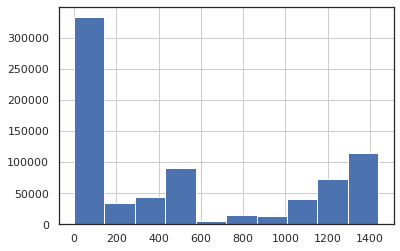

In [101]:
df['mean_timebuy'].hist(bins=10);

Вывод: Большое количество пользователей так ничего и не покупают. Это тревожный звоночек.

6.7 Рассчитал среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

In [103]:
first_orders_date = orders_df.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders_date.columns = ['uid', 'first_order_ts'] 
first_orders_date['first_order_month'] = first_orders_date['first_order_ts'].astype('datetime64[M]')
first_orders_date['first_order_dt'] = first_orders_date['first_order_ts'].astype('datetime64[M]')

#объединяем ВИЗИТЫ и заказы :)
buyers_df = pd.merge(first_visits_date,first_orders_date, on='uid')# первый месяц покупки


#добавляем столбец в orders 
orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')


cohort_sizes = (buyers_df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()) 
cohort_sizes.columns = ['first_order_month', 'n_buyers'] # количество покупателей за каждый месяц



cohorts = pd.merge(orders_df, buyers_df, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'count'}).reset_index() #количество заказов

#считаем в этой таблице
cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
cohorts['age'] = cohorts['age'].round().astype('int')


report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

#возраст когорты

report['mean_orders'] = report['revenue'] / report['n_buyers'] # покупки на одного человека

#cumsum и round
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='mean_orders', 
    aggfunc='sum').cumsum(axis=1)

output.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [104]:
round(output[5].mean(), 2)

1.43

Вывод: В среднем пользователь совершает 1-2 покупки, это немного, такой показатель наблюдается по всем когортам.

6.8 Рассчитал средний чек, применяя группировку по времени совершения покупки. Построил график отражающий изменения метрики во времени.

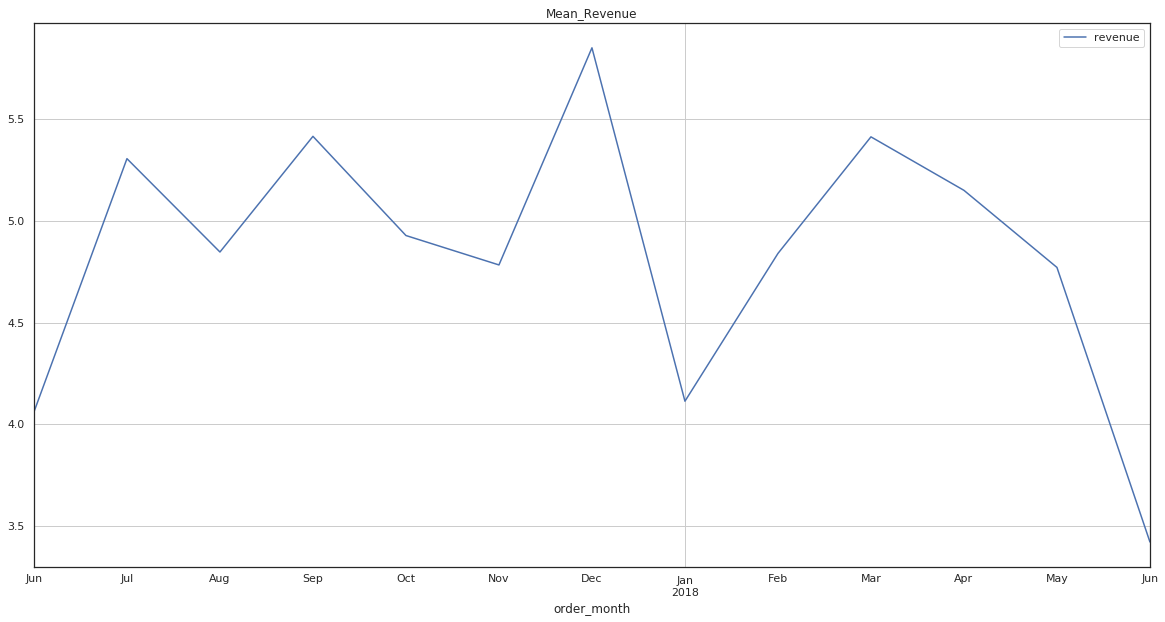

In [105]:
revenue_mean = orders_df.pivot_table(index='order_month', values='revenue', aggfunc=[lambda u: u.nunique(), 'mean'])
revenue_mean.columns = ['users', 'revenue']
revenue_mean.plot(y='revenue', grid=True, figsize=(20, 10), title='Mean_Revenue');

In [106]:
orders_df['revenue'].mean() 

4.999646930477041

Вывод: Посещаемость сайта в период с ноября по декабрь самая высокая, вот и средний чек в этот мериод имеет максимальный показатель. Опять же предновогодний период скидок.

6.9 Рассчитал средний LTV по когортам за 6 месяцев, отразил изменения метрики во времени на графике.

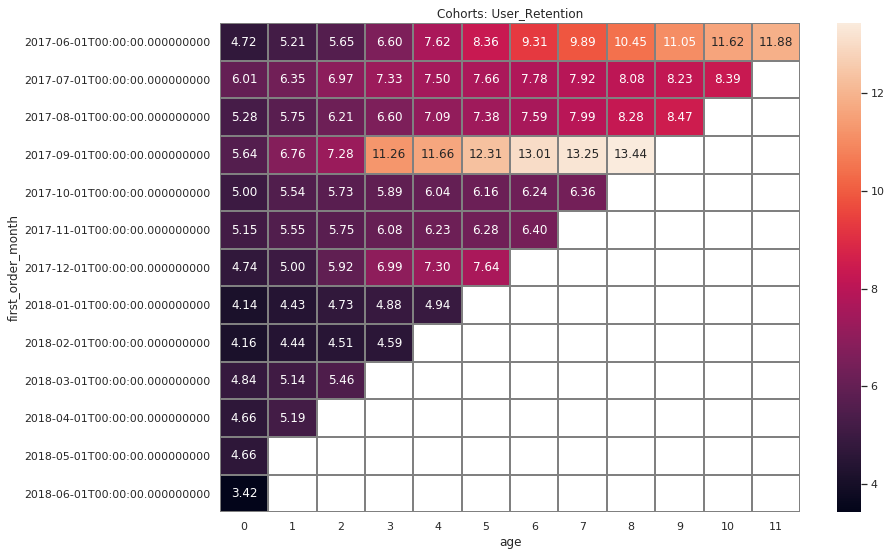

In [107]:
#верно
cohorts_ltv = pd.merge(orders_df, buyers_df, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()



#тут посчитаем
cohorts_ltv['age'] = (cohorts_ltv['order_month'] - cohorts_ltv['first_order_month']) / np.timedelta64(1, 'M')
cohorts_ltv['age'] = cohorts_ltv['age'].round().astype('int')


#нужно объединить с cohort_sizes, который считали для покупок
report_ltv = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

# тут отлично
margin_rate = 1

report_ltv['gp'] = report_ltv['revenue'] * margin_rate

report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']

#не забываем про cumsum и round
ltv_pivot = report_ltv.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='sum',
).cumsum(axis=1)

ltv_pivot.round(2).fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User_Retention')
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray'); 

Вывод: Значительный прирост прибыли с клиента наблюдается в когортах с июня по сентябрь и в декабрьской когорте.

* Маркетинговые метрики

6.10 Посчитал общую сумму расходов на маркетинг. Выяснил, как траты распределены по источникам. Построил график изменения метрик во времени.

In [108]:
costs_df['costs'].sum()

329131.62

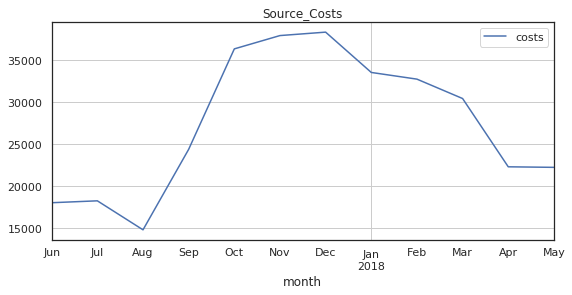

In [109]:
costs_df['month'] = costs_df['dt'].astype('datetime64[M]') 

costs_total = (costs_df.groupby('month')
    .agg({'costs': 'sum'})
    .reset_index()
)

costs_total.plot(y='costs', x='month', grid=True, figsize=(9, 4), title='Source_Costs');

Вывод: В период с октября по декабрь, вливание денежных средств на маркетинг имеет максимальные показатели. Причиной тому, привлечение клиента в предновогодний период.

6.11 Расчитал CAC на одного покупателя для всего проекта и для каждого источника трафика.Отразил изменения метрик на графиках.

* CAC на одного покупателя.

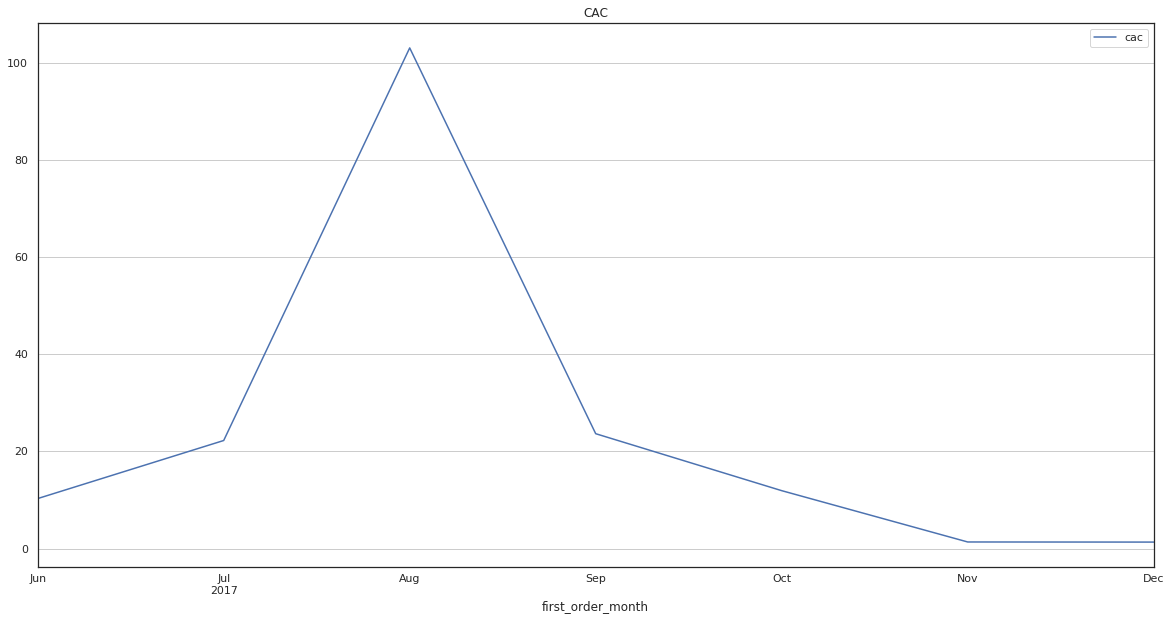

In [110]:
source_group = (
    costs_df.groupby('source_id')
    .agg({'costs': 'sum'})
    .reset_index()) # группируем источники и суммируем траты

order_group = (
   buyers_df.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()) # группируем первые месяцы заказа и берем только уникальные id

source_order_df = source_group.merge(order_group, left_index=True, right_index=True) # соединил таблицы


source_order_df['cac'] = source_order_df['costs'] / source_order_df['uid'] # посчитал cac 
source_order_df.plot(x='first_order_month', y='cac', grid=True, figsize=(20, 10), title='CAC'); # построил график

* CAC для каждого источника трафика.

In [111]:
source_group.head() # таблица, где сгруппированы источники и просуммированы траты.

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"


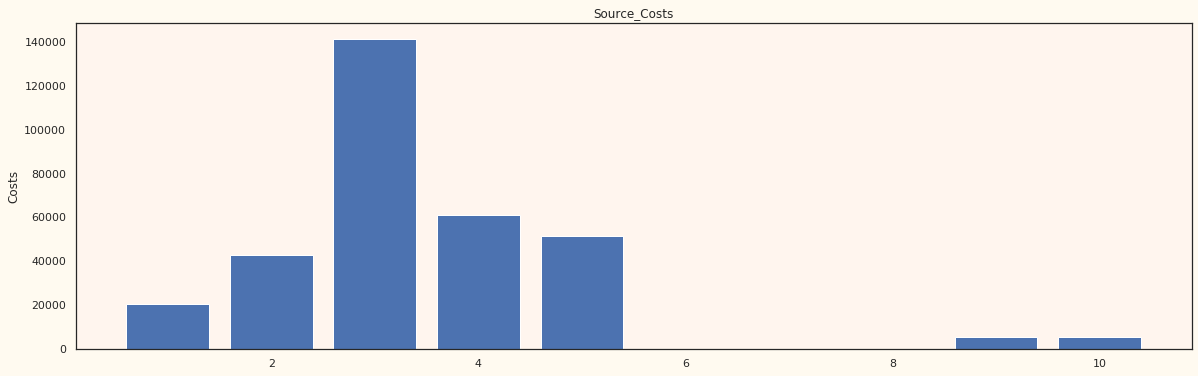

In [112]:
# построил график 
x = source_group['source_id']
y = source_group['costs']

fig, ax_na_cp = plt.subplots()

ax_na_cp.bar(x, y)

ax_na_cp.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_na_cp.set_ylabel('Costs')
ax_na_cp.set_title('Source_Costs')

plt.show()

Вывод: Максимальная общая сумма на маркетинг приходится на 3ий источник.

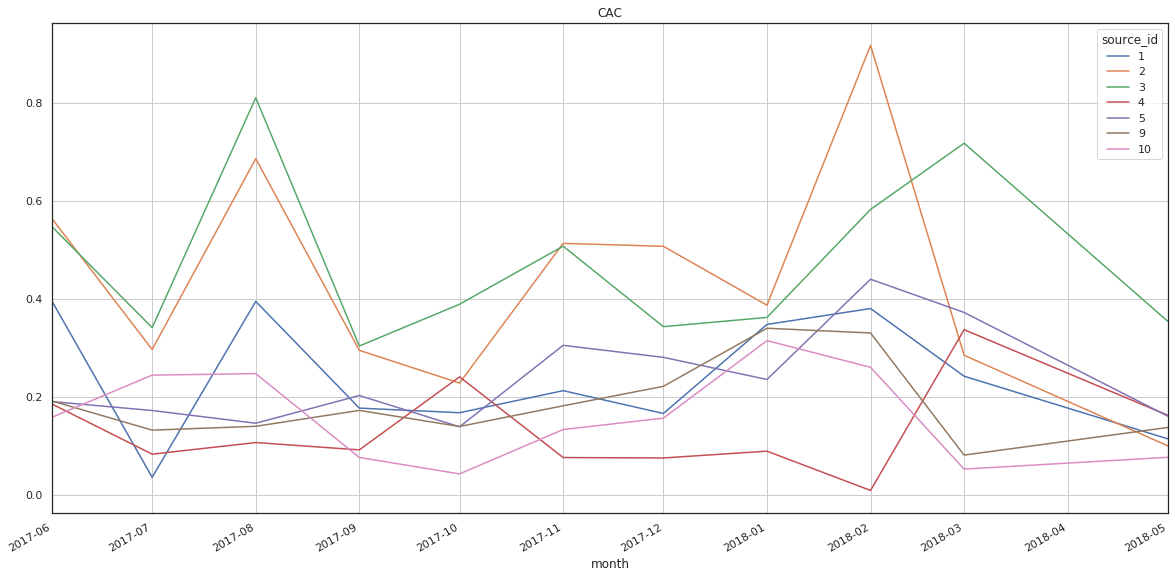

In [113]:
users = visits_df.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers_df, users, left_on='uid', right_index=True)

buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)

costs_df['first_session_dt'] = costs_df['dt'].astype('datetime64[D]')
#объединить
df_1 = pd.merge(buyers_daily,costs_df, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])

# cоединяем с тратами
df_1['cac'] = df_1['costs'] / df_1['n_buyers'] # посчитал cac

cac_pivot = df_1.pivot_table(
    index='month',
    columns='source_id',
    values='cac',
    aggfunc='mean',
).plot(grid=True, figsize=(20, 10), title='CAC'); # сводная таблица и график


Вывод: Источники 3,4,5 имеют внушительные денежные вложения, пик стоимости привлечения клиента по этим источникам приходится на август и февраль. По этим источникам видно, что привлечение клиента идет в летний и зимний периоды.

6.12 Рассчитал ROMI по когортам в разрезе источников. Построил графики, отражающие изменения метрик во времени.

In [114]:
first_visits = visits_df.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

# добавим колонки даты и месяца
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

# Найдем время первой покупки каждого покупателя
first_orders = orders_df.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

order_month = orders_df[['uid', 'order_month','revenue']]
first_orders = first_orders.merge(order_month, on='uid')
# объединяем данные о первых покупках с данными о первых сессиях
buyers = pd.merge(first_visits, first_orders, on='uid')

In [116]:
buyers['order_month'] = buyers['order_month'].astype('datetime64[M]')


#отсортируем визиты по начальной дате и сгруппируем по первому uid.
users = visits_df.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]

#объединим с users
orders_new = pd.merge(buyers,users, left_on='uid', right_index=True)

#сгруппируем по источнику и первому месяцу заказа, здесь нужны только уникальные uid
cohort_sizes_t = (
    orders_new.groupby(['source_id', 'first_order_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

#сгруппируем по источнику и первому месяцу заказа, проссумируем revenue
cohorts_revenue_t = (
    orders_new.groupby(['source_id', 'first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

# объединим таблицы, посчитаем age и ltv
report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
report_romi['age'] = (
    report_romi['order_month'] - report_romi['first_order_month']
) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

#добавим таблицу costs, посчитаем сас и romi
report_romi = pd.merge(report_romi,costs_df.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index(),
               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
report_romi = report_romi.drop(['month'], axis = 1) 
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
display(report_romi.head())


,source_id,first_order_month,n_buyers,order_month,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,"1,378.70",0,7.26,"1,125.61",5.92,1.22
1,1,2017-06-01,190,2017-07-01,414.98,1,2.18,"1,125.61",5.92,0.37
2,1,2017-06-01,190,2017-08-01,419.43,2,2.21,"1,125.61",5.92,0.37
3,1,2017-06-01,190,2017-09-01,714.24,3,3.76,"1,125.61",5.92,0.63
4,1,2017-06-01,190,2017-10-01,811.20,4,4.27,"1,125.61",5.92,0.72


* источник 1.

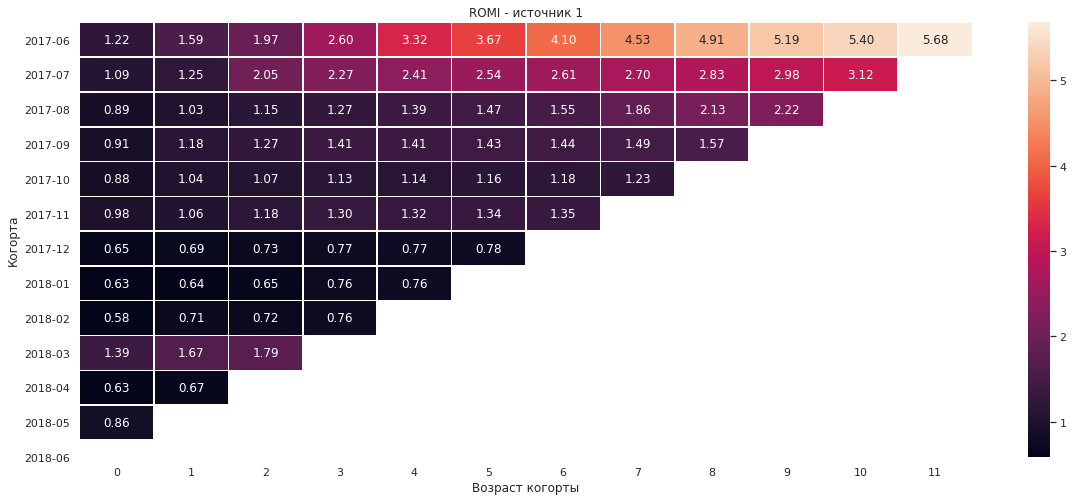

In [117]:
romi_1 = report_romi.query('source_id == 1')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_1.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 1')
sns.heatmap(romi_1, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: В большинстве своем когорты окупились либо близки к этому.

In [118]:
ltv_1 = report_romi.query('source_id == 1')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_1.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,7.26,9.44,11.65,15.41,19.68,21.73,24.31,26.83,29.10,30.77,31.97,33.64
2017-07-01,7.29,8.39,13.74,15.25,16.13,17.03,17.47,18.12,18.98,19.96,20.89,
2017-08-01,7.49,8.69,9.70,10.67,11.70,12.37,13.05,15.71,17.90,18.68,,
2017-09-01,6.01,7.82,8.38,9.30,9.34,9.43,9.52,9.83,10.42,,,
2017-10-01,6.02,7.07,7.32,7.71,7.77,7.88,8.06,8.38,,,,
2017-11-01,7.39,7.96,8.93,9.82,9.99,10.09,10.17,,,,,
2017-12-01,4.58,4.90,5.18,5.43,5.46,5.55,,,,,,
2018-01-01,5.77,5.86,6.00,6.98,7.03,,,,,,,
2018-02-01,4.69,5.69,5.75,6.12,,,,,,,,


* источник 2.

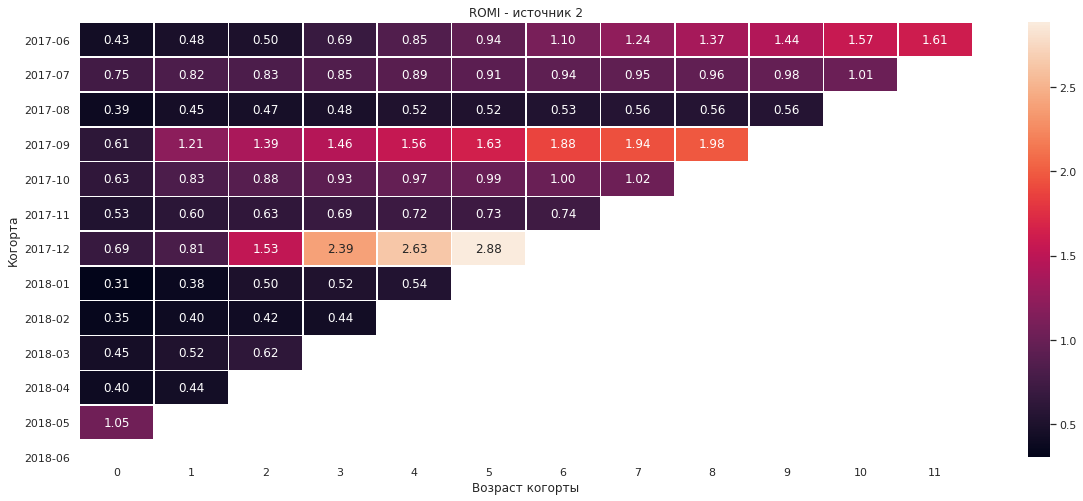

In [119]:
romi_2 = report_romi.query('source_id == 2')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_2.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 2')
sns.heatmap(romi_2, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: Половина когорт окупилась.

In [120]:
ltv_2 = report_romi.query('source_id == 2')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_2.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.44,4.93,5.20,7.13,8.80,9.72,11.32,12.80,14.14,14.87,16.23,16.66
2017-07-01,8.43,9.20,9.25,9.58,10.01,10.19,10.49,10.63,10.74,10.97,11.33,
2017-08-01,5.74,6.67,6.85,7.10,7.62,7.68,7.80,8.20,8.23,8.31,,
2017-09-01,8.28,16.41,18.77,19.70,21.10,22.08,25.40,26.15,26.70,,,
2017-10-01,7.68,10.13,10.79,11.33,11.89,12.16,12.26,12.51,,,,
2017-11-01,6.99,7.90,8.34,9.12,9.43,9.58,9.72,,,,,
2017-12-01,8.81,10.35,19.68,30.78,33.83,37.04,,,,,,
2018-01-01,4.34,5.43,7.17,7.42,7.74,,,,,,,
2018-02-01,5.42,6.06,6.39,6.64,,,,,,,,


* источник 3.

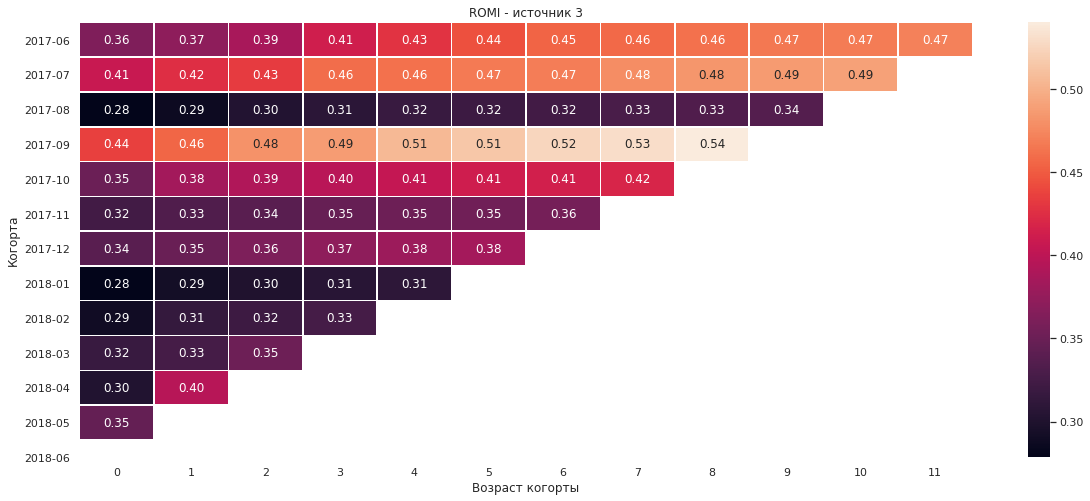

In [121]:
romi_3 = report_romi.query('source_id == 3')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_3.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 3')
sns.heatmap(romi_3, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: В данном источнике картина плачевная, когорты не окупились.

In [122]:
ltv_3 = report_romi.query('source_id == 3')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_3.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.40,4.51,4.69,5.01,5.19,5.38,5.51,5.54,5.59,5.65,5.67,5.71
2017-07-01,6.11,6.37,6.49,6.89,6.93,7.00,7.03,7.17,7.25,7.29,7.35,
2017-08-01,5.08,5.23,5.52,5.63,5.79,5.84,5.90,6.00,6.08,6.14,,
2017-09-01,5.56,5.81,6.14,6.22,6.45,6.57,6.69,6.77,6.89,,,
2017-10-01,4.79,5.24,5.36,5.43,5.53,5.63,5.65,5.72,,,,
2017-11-01,4.53,4.67,4.75,4.87,4.92,4.96,4.99,,,,,
2017-12-01,4.18,4.31,4.45,4.58,4.68,4.74,,,,,,
2018-01-01,4.11,4.30,4.43,4.51,4.56,,,,,,,
2018-02-01,3.79,4.10,4.19,4.25,,,,,,,,


* источник 4.

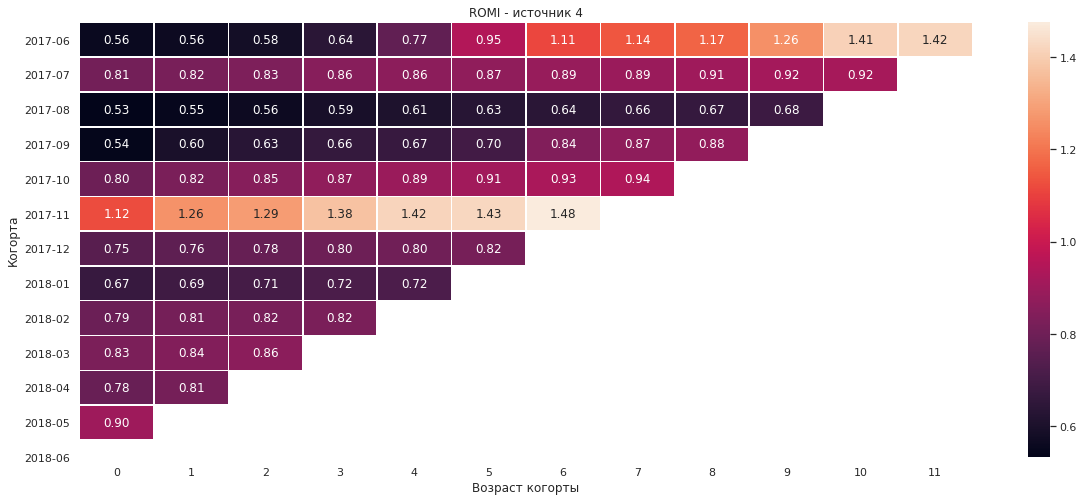

In [123]:
romi_4 = report_romi.query('source_id == 4')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_4.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 4')
sns.heatmap(romi_4, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: Окупились две когорты, остальные были близки к этому.

In [124]:
ltv_4 = report_romi.query('source_id == 4')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_4.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.75,4.79,4.96,5.42,6.56,8.05,9.48,9.72,9.93,10.73,12.00,12.09
2017-07-01,5.54,5.60,5.68,5.84,5.90,5.96,6.06,6.11,6.20,6.26,6.28,
2017-08-01,5.06,5.23,5.36,5.63,5.78,5.99,6.07,6.26,6.35,6.48,,
2017-09-01,4.77,5.25,5.56,5.85,5.90,6.14,7.39,7.66,7.71,,,
2017-10-01,4.37,4.51,4.67,4.78,4.90,4.99,5.08,5.14,,,,
2017-11-01,5.14,5.79,5.89,6.30,6.49,6.54,6.76,,,,,
2017-12-01,4.17,4.26,4.35,4.44,4.48,4.56,,,,,,
2018-01-01,3.78,3.90,3.99,4.06,4.09,,,,,,,
2018-02-01,4.09,4.20,4.24,4.26,,,,,,,,


* источник 5.

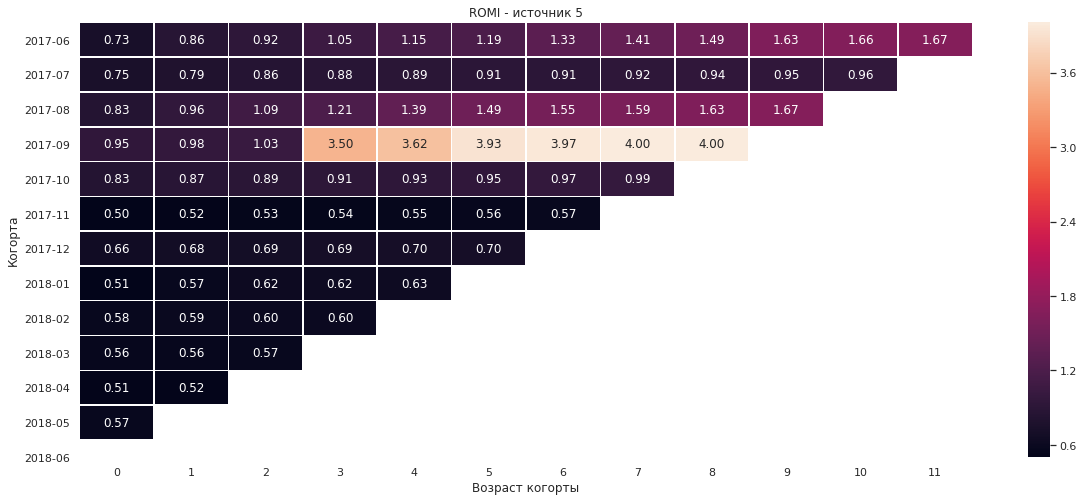

In [125]:
romi_5 = report_romi.query('source_id == 5')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_5.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 5')
sns.heatmap(romi_5, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: 3 когорты окупились, две были близки к тому чтобы окупиться, остальные когорты дали маху.

In [126]:
ltv_5 = report_romi.query('source_id == 5')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_5.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.95,5.85,6.30,7.17,7.83,8.13,9.04,9.62,10.18,11.13,11.28,11.40
2017-07-01,5.29,5.61,6.06,6.21,6.31,6.42,6.45,6.56,6.65,6.71,6.78,
2017-08-01,5.05,5.80,6.63,7.34,8.42,9.02,9.40,9.65,9.89,10.12,,
2017-09-01,6.20,6.38,6.71,22.88,23.65,25.67,25.95,26.15,26.17,,,
2017-10-01,5.09,5.31,5.43,5.56,5.67,5.77,5.91,6.04,,,,
2017-11-01,4.56,4.75,4.87,4.92,5.06,5.10,5.21,,,,,
2017-12-01,5.01,5.14,5.23,5.29,5.31,5.31,,,,,,
2018-01-01,4.35,4.87,5.25,5.29,5.31,,,,,,,
2018-02-01,4.32,4.41,4.46,4.47,,,,,,,,


* источник 9.

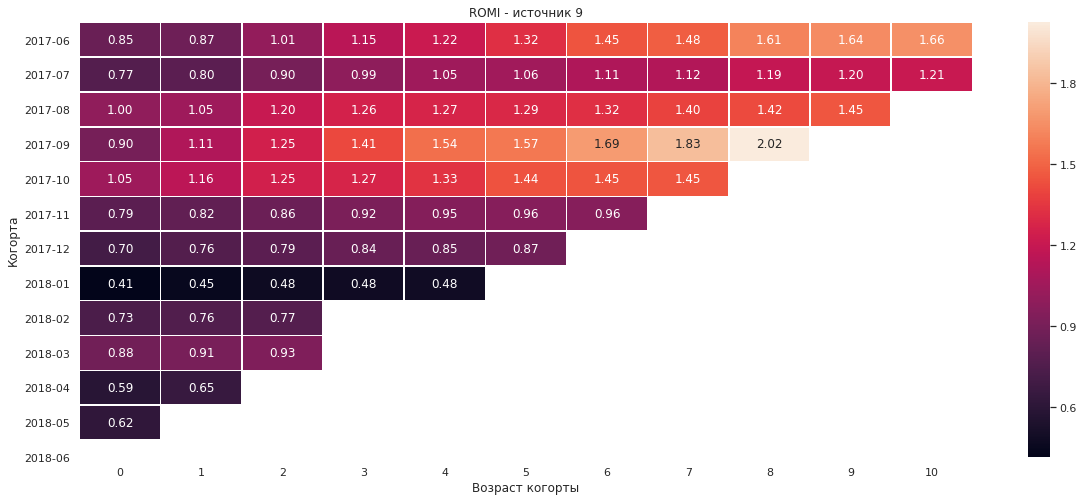

In [127]:
romi_9 = report_romi.query('source_id == 9')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_9.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 9')
sns.heatmap(romi_9, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: Почти половина когорт окупилась.

In [128]:
ltv_9 = report_romi.query('source_id == 9')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_9.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,3.57,3.64,4.23,4.84,5.10,5.55,6.08,6.20,6.74,6.86,6.94
2017-07-01,4.47,4.63,5.25,5.74,6.11,6.17,6.46,6.51,6.94,6.97,7.04
2017-08-01,4.07,4.27,4.91,5.15,5.20,5.27,5.40,5.69,5.77,5.93,
2017-09-01,4.30,5.32,5.95,6.75,7.35,7.48,8.09,8.76,9.67,,
2017-10-01,5.06,5.60,6.04,6.16,6.45,6.99,7.01,7.03,,,
2017-11-01,3.74,3.87,4.04,4.32,4.47,4.51,4.53,,,,
2017-12-01,3.83,4.14,4.31,4.58,4.60,4.75,,,,,
2018-01-01,2.83,3.05,3.25,3.29,3.31,,,,,,
2018-02-01,4.80,4.97,5.05,,,,,,,,


* источник 10.

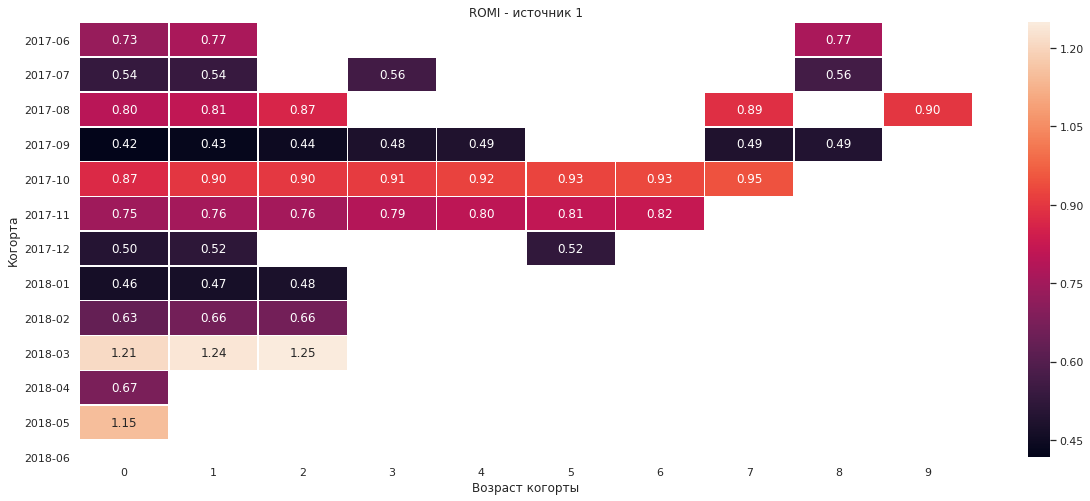

In [129]:
romi_10 = report_romi.query('source_id == 10')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_10.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 1')
sns.heatmap(romi_10, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=output.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Вывод: Окупилось две когорты.

In [130]:
ltv_10 = report_romi.query('source_id == 10')\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)
ltv_10.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,2.41,2.53,,,,,,,2.54,
2017-07-01,3.46,3.49,,3.64,,,,,3.65,
2017-08-01,5.00,5.11,5.44,,,,,5.56,,5.65
2017-09-01,2.23,2.30,2.38,2.57,2.60,,,2.61,2.64,
2017-10-01,2.62,2.70,2.71,2.73,2.77,2.78,2.80,2.85,,
2017-11-01,4.62,4.67,4.69,4.87,4.98,5.03,5.08,,,
2017-12-01,3.79,3.93,,,,3.99,,,,
2018-01-01,3.10,3.11,3.18,,,,,,,
2018-02-01,2.47,2.59,2.59,,,,,,,


Вывод: Лучше всего окупились когорты из 1 и 9 источников, большее вложение денежных средств делали для источников 3,4,5. Третий источник совсем не окупился, стоит пересмотреть стратегию маркетинга.

### Выводы и рекомендации 
<a id='cell4'></a>

* 7.1 Большинство когорт окупилось по 1-ому и 9-ому источнику, особенно выделяется 1-ый источник в котором выделяется июньская когорта с завидным прибавлением. Упор необходимо делать именно на эти источники. Ориентировался на метрики ROMI в разрезе источников.

* 7.2 


 * В среднем ежедневное посещение сайта - 907 человек, еженедельное - 5716 человек, ежемесячное - 23228, также пользователь в среднем в день не так часто заходит на сайт, примерно 1 раз. Чаще всего сессия пользователя длится 1 минуту, довольно мало. Коэфициент удержания по всем когортам низкий, лучше всего дела обстоят у июньской когорты.
 
 
 * Многие пользователи так ничего и не покупают на сайте. Медиана значений времени с момента первого посещения сайта до совершения покупки - 340 минут. Среднее количество покупок на одного покупателя - 1,43. Средний чек 4,9. Когорты июля и сентября приносят прибыли более остальных.
 
 
 * Самые крупные вливания денежных средств на маркетинг проходили в период с октября по декабрь. Самая большая стоимость привлечения клиента проходила в период с июля по сентябрь. Самые крупные вложения сделали в источники 4,5.

* 7.3 

* Судя по показателям ltv, когорты - июнь, июль, август, сентябрь, самые перспективные и на них стоит делать упор.